In [1]:
#Author vishwanath Akuthota 

import pandas as pd
import numpy as np
import matplotlib as plt

import sqlite3
import time
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('Emails.csv')

In [3]:
df.shape

(7945, 22)

In [4]:
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [5]:
df.dtypes

Id                                int64
DocNumber                        object
MetadataSubject                  object
MetadataTo                       object
MetadataFrom                     object
SenderPersonId                  float64
MetadataDateSent                 object
MetadataDateReleased             object
MetadataPdfLink                  object
MetadataCaseNumber               object
MetadataDocumentClass            object
ExtractedSubject                 object
ExtractedTo                      object
ExtractedFrom                    object
ExtractedCc                      object
ExtractedDateSent                object
ExtractedCaseNumber              object
ExtractedDocNumber               object
ExtractedDateReleased            object
ExtractedReleaseInPartOrFull     object
ExtractedBodyText                object
RawText                          object
dtype: object

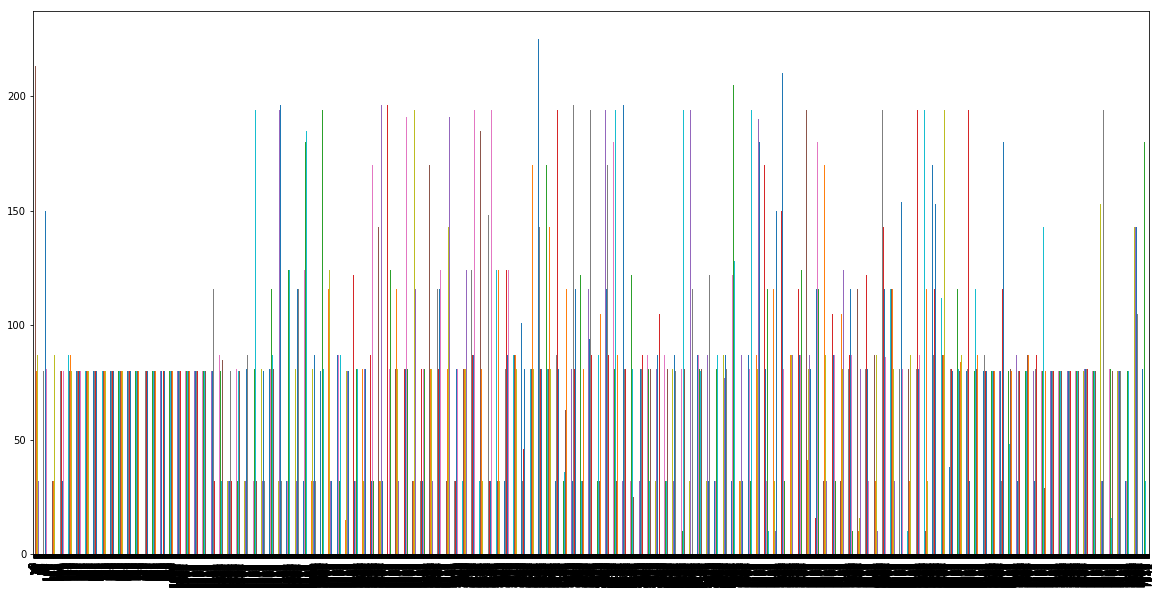

In [6]:
df.SenderPersonId.plot(kind='bar', figsize=(20,10))

In [7]:
persons = pd.read_csv("Persons.csv")
emails  = pd.read_csv("Emails.csv")

hilaryEmails = emails[emails.SenderPersonId == 80]
hilaryEmails = hilaryEmails.dropna(how='any')

In [8]:

#Temporal Analysis
#Wrangle the time into a readable format

#For the most part the times are in the following format:

#day of week, Month Day, Year, time AM|PM

date_re = r'(?P<dow>\w+,\s*?)?(?P<month>)'

In [9]:
hilaryEmails.ExtractedDateSent[hilaryEmails.ExtractedDateSent.str.split(" ").apply(len) == 6]

65           Saturday, April 02, 2011 1034 AM
82          Monday, October 08, 2012 07:26 AM
89       Saturday, September 15, 2012 6:36 PM
92      Saturday, September 15, 2012 06:36 PM
103      Saturday, September 15, 2012 6:53 PM
105          Friday, October 12, 2012 6:10 AM
111      Saturday, September 15, 2012 7.13 PM
112        Sunday, September 16, 2012 7:50 AM
115        Sunday, September 16, 2012 8:57 AM
117        Sunday, September 16, 2012 8:57 AM
123       Sunday, September 16, 2012 08:59 AM
131          Sunday, October 14, 2012 9:40 AM
136           Sunday, October 14, 2012 947 AM
139       Sunday, September 16, 2012 02:36 PM
157          Monday, August 22, 2011 07:06 AM
183       Sunday, September 23, 2012 10:29 PM
202       Sunday, September 23, 2012 10:57 PM
215        Thursday, January 12, 2012 3:41 PM
219         Friday, November 23, 2012 4:16 PM
250       Thursday, December 20, 2012 8:03 AM
252       Thursday, December 20, 2012 8:23 AM
296           Monday, April 13, 20

In [10]:
#Some dates are pretty bad and need manual readjustment. I will not try to do that here

def fixDate(date):
    spl = date.split(" ")
    
    if len(spl) >= 6:
        try:
            if spl[0].startswith(u'\xef\xbf\xbd'):
                spl = spl[1:]
        except UnicodeEncodeError:
            spl = spl[1:]
        dow, month, day, year, time = spl[:5]
    elif len(spl) == 5:
        if spl[-1].endswith('M'):
            return np.NAN
        else:
            dow, month, day, time, year = spl[:5]
    else:
        return np.NAN
    try:
        if ':' not in time:
            time = time[:-2] + ':' + time[-2:]
        return u"{} {} {} {}".format(month, day, year, time.replace('.', ''))
    except UnicodeEncodeError as e:
        print(e)

In [11]:
def tryToCoerce(s):
    try:
        return pd.to_datetime(fixDate(s))
    except Exception:
        return np.NaN

In [12]:
pd.to_datetime(fixDate('Thu Sep 17 06:03:43 2009'))

Timestamp('2009-09-17 06:03:43')

In [13]:
sum(hilaryEmails.ExtractedDateSent.apply(tryToCoerce).isnull())

12

In [14]:
hilaryEmails['cleanedDate'] = (hilaryEmails.ExtractedDateSent.apply(tryToCoerce).dropna(how="any"))

In [15]:
hilaryEmails.index = hilaryEmails.cleanedDate

In [16]:
hilaryEmails.sort_index(inplace=True)

In [17]:
minDate, maxDate = hilaryEmails.index.min(), hilaryEmails.index.max()

In [18]:
"Hilary's emails range from {} to {}".format(minDate.date(), maxDate.date())

"Hilary's emails range from 2009-04-13 to 2012-12-20"

In [19]:
# How many emails per day did she send?

/Users/vishwanathakuthota/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  """Entry point for launching an IPython kernel.


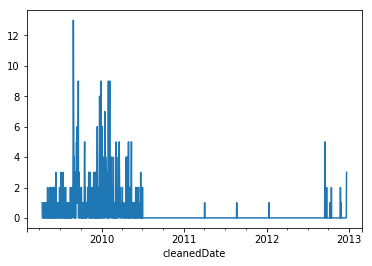

In [20]:
hilaryEmails.resample('D', how='count').Id.plot()

In [21]:
#There is intense email activity around july 2009 to july 2010. It then drops off. You can inspect to make sure

# before 2011 and after counts
hilaryEmails[:'2011-01'].Id.count(), hilaryEmails['2011-01':].Id.count()

(469, 24)

In [22]:
#On Which day did she send the most emails?
hilaryEmails.Id.resample("D").count().sort_values(ascending=False).head(1)

cleanedDate
2009-08-29    13
Name: Id, dtype: int64

In [23]:
#What happened on 8-29-2009!?

hilaryEmails['2009-08-29'][['MetadataSubject', 'ExtractedBodyText']]

,MetadataSubject,ExtractedBodyText
cleanedDate,,
2009-08-29 01:21:00,CALL LIST,"Ok, thx."
2009-08-29 01:47:00,HONDURAS MILITARY COUP DECISION,I am just taking off. When I land I will call ...
2009-08-29 05:44:00,(NYTIMES) U.S. ACCUSES PAKISTAN OF ALTERING MI...,I just stopped at and no one was home so I'm h...
2009-08-29 07:48:00,HONDURAS MILITARY COUP DECISION,Ok--i should be free after 2. Pls email when y...
2009-08-29 07:51:00,CALL LIST,Did we ever get a time? The call will last an ...
2009-08-29 07:53:00,CALL LIST,I cannot do before 1 today. What about 7 or 8 ...
2009-08-29 07:57:00,CALL LIST,Ok.
2009-08-29 08:32:00,OPRAH,Who will interview me?
2009-08-29 08:39:00,OPRAH,But I'm leaving here on Wed and I'll be at hom...


woowooooo she spoke with Oprah......

In [24]:
#What were her email times?
hilaryEmails.groupby(lambda s: s.hour).apply(len)

1.0     32
2.0     14
3.0     23
4.0     28
5.0     35
6.0     59
7.0     78
8.0     43
9.0     62
10.0    59
11.0    32
12.0    28
dtype: int64

In [25]:
import sqlite3
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

sql_conn = sqlite3.connect('database.sqlite')

data = sql_conn.execute('SELECT MetadataTo, MetadataFrom FROM Emails WHERE MetadataTo LIKE "H"')


In [26]:
pseudonyms = ["sbwhoeop","pir","millscd@state.gov","abedinh@state.gov",
              "cheryl.mills","mills, cheryl","jake.sullivan","sullivan, jake", 
              "mills, chery","sullivanjj@state.gov","jilotylc@state.gov","pverveer",
              "pverveer","valmorolj@state.gov","preines","hanleymr@state.gov",
              "slaughtera@state.gov","vermarr@state.gov","russorv@state.gov","balderstonkm@state.gov",
              "muscatinel@state.gov","reinesp@state.gov","crowleypj@state.gov","stalbott",
              "mchaleja@state.gov","campbellkm@state.gov","verveerms@state.gov","steinbergjb@state.gov",
              "lewjj@state.gov"]
              
realNames = ["Blumenthal, Sidney","Reines, Philippe I","Mills, Cheryl D","Abedin, Huma",
         "Mills, Cheryl D","Mills, Cheryl D","Sullivan, Jacob J","Sullivan, Jacob J",
         "Mills, Cheryl D","Sullivan, Jacob J","Jiloty, Lauren C","Verveer, Melanne S",
         "Verveer, Melanne S","Valmoro, Lona J","Reines, Philippe I","Hanley, Monica R",
         "Slaughter, Anne-Marie","Verma, Richard R","Russo, Robert V","Balderston, Kris M",
         "Muscatine, Lissa","Reines, Philippe I","Crowley, Philip J","Talbott, Strobe",
         "McHale, Judith A","Campbell, Kurt M","Verveer, Melanne S","Steinberg, James B",
         "Lew, Jacob J"]

In [27]:
print(len(pseudonyms), len(realNames))

29 29


In [28]:
otherSenders = []

#No hiding behind fake names!
for email in data:
    if email[1] != '':
        if email[1].lower() in pseudonyms:
            otherSenders.append(realNames[pseudonyms.index(email[1].lower())])
        else:
            otherSenders.append(email[1])

c = Counter(otherSenders)
topSenders = (c.most_common(20))


names = [x[0] for x in topSenders]
y_pos = np.arange(0, len(names)*2, 2)
#y_pos = np.arange(len(names))
values = [x[1] for x in topSenders]

top senders:  ['Abedin, Huma', 'Mills, Cheryl D', 'Sullivan, Jacob J', 'Blumenthal, Sidney', 'Jiloty, Lauren C', 'Reines, Philippe I', 'Valmoro, Lona J', 'Slaughter, Anne-Marie', 'Verma, Richard R', 'Verveer, Melanne S', 'Muscatine, Lissa', 'McHale, Judith A', 'Ebeling, Betsy', 'Talbott, Strobe', 'Hanley, Monica R', 'Russo, Robert V', 'Balderston, Kris M', 'Blair, Cherie', 'Crowley, Philip J', 'Fuchs, Michael H']


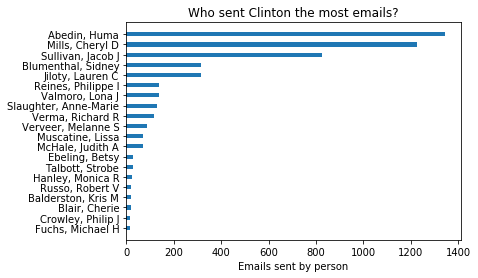

In [29]:
fig1 = plt.figure()
plt.barh(y_pos, values, align='center')
plt.yticks(y_pos, names)
plt.gca().invert_yaxis()
plt.axis('tight')
#plt.tick_params(axis="y",labelsize="10")
plt.xlabel('Emails sent by person')
plt.title('Who sent Clinton the most emails?')
plt.savefig("1.ClintonSenders.png",bbox_inches='tight')

print("top senders: ", names)

In [30]:
data = sql_conn.execute('SELECT MetadataTo, MetadataFrom FROM Emails WHERE MetadataFrom LIKE "H"')

otherReceivers = []

for email in data:
    if email[0] != '':
        if email[0].lower() in pseudonyms:
            otherReceivers.append(realNames[pseudonyms.index(email[0].lower())])
        else:
            otherReceivers.append(email[0])

c = Counter(otherReceivers)
topReceivers = (c.most_common(20))

names = [x[0] for x in topReceivers]
y_pos = np.arange(0, len(names)*2, 2)
#y_pos = np.arange(len(names))
values = [x[1] for x in topReceivers]

top receivers:  ['Abedin, Huma', 'Mills, Cheryl D', 'Sullivan, Jacob J', 'Jiloty, Lauren C', 'Valmoro, Lona J', 'Reines, Philippe I', 'Blumenthal, Sidney', 'Hanley, Monica R', 'Slaughter, Anne-Marie', 'Verma, Richard R', 'Russo, Robert V', 'Verveer, Melanne S', 'Balderston, Kris M', 'Muscatine, Lissa', 'Talbott, Strobe', 'Crowley, Philip J', 'McHale, Judith A', 'Campbell, Kurt M', 'Steinberg, James B', 'Lew, Jacob J']


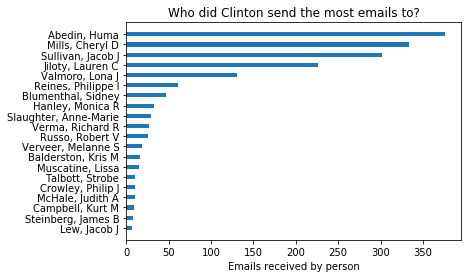

In [31]:
fig1 = plt.figure()
plt.barh(y_pos, values, align='center')
plt.yticks(y_pos, names)
plt.gca().invert_yaxis()
plt.axis('tight')
#plt.tick_params(axis="y",labelsize="10")
plt.xlabel('Emails received by person')
plt.title('Who did Clinton send the most emails to?')
plt.savefig("2.ClintonReceivers.png",bbox_inches='tight')

print("top receivers: ", names)